In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.415569,0.707451,-6.014510e-07,0.492598,0.649255,-0.015493,0.535171,0.551677,-0.016015,0.551790,...,0.398867,0.447814,-0.031962,0.403077,0.513780,-0.017992,0.382900,0.533670,0.000044,A
1,0.383157,0.705476,-3.902652e-07,0.459068,0.681768,-0.021066,0.519991,0.591640,-0.023375,0.547922,...,0.393618,0.455356,-0.026020,0.390099,0.519671,-0.010454,0.373084,0.534647,0.007537,A
2,0.442802,0.720691,-6.299302e-07,0.519509,0.669234,-0.016808,0.565608,0.574118,-0.017538,0.584066,...,0.433521,0.448486,-0.031750,0.434974,0.511373,-0.016801,0.419079,0.532495,0.001692,A
3,0.422893,0.741511,-7.332600e-07,0.506524,0.686827,-0.015027,0.554081,0.591354,-0.015149,0.570833,...,0.413811,0.464850,-0.033043,0.415446,0.532655,-0.017781,0.399077,0.553694,0.000817,A
4,0.402343,0.740938,-6.663715e-07,0.486506,0.689135,-0.017238,0.538544,0.598364,-0.020553,0.559193,...,0.402742,0.470470,-0.037179,0.402873,0.539379,-0.020480,0.385635,0.558936,-0.000715,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,0.386501,0.716416,6.100660e-07,0.444694,0.758840,0.000931,0.500023,0.749175,-0.002815,0.533858,...,0.533903,0.724000,-0.054579,0.517948,0.751303,-0.048109,0.497720,0.757340,-0.037716,R
2168,0.437080,0.712324,5.431693e-07,0.487675,0.746481,-0.000452,0.536745,0.735263,-0.005304,0.568781,...,0.576170,0.710699,-0.053741,0.562758,0.735319,-0.046817,0.543989,0.739383,-0.037092,R
2169,0.439708,0.749698,6.565692e-07,0.487106,0.784969,0.009662,0.539711,0.784164,0.006434,0.575217,...,0.604424,0.775287,-0.056910,0.585379,0.804644,-0.048073,0.560652,0.811833,-0.036798,R
2170,0.415758,0.729843,6.188372e-07,0.469656,0.763954,-0.000091,0.521464,0.755994,-0.004745,0.555216,...,0.560361,0.734280,-0.056014,0.546024,0.761904,-0.049230,0.525874,0.769449,-0.038522,R


In [12]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.415569,0.707451,-6.014510e-07,0.492598,0.649255,-0.015493,0.535171,0.551677,-0.016015,0.551790,...,0.398867,0.447814,-0.031962,0.403077,0.513780,-0.017992,0.382900,0.533670,0.000044,A
1,0.383157,0.705476,-3.902652e-07,0.459068,0.681768,-0.021066,0.519991,0.591640,-0.023375,0.547922,...,0.393618,0.455356,-0.026020,0.390099,0.519671,-0.010454,0.373084,0.534647,0.007537,A
2,0.442802,0.720691,-6.299302e-07,0.519509,0.669234,-0.016808,0.565608,0.574118,-0.017538,0.584066,...,0.433521,0.448486,-0.031750,0.434974,0.511373,-0.016801,0.419079,0.532495,0.001692,A
3,0.422893,0.741511,-7.332600e-07,0.506524,0.686827,-0.015027,0.554081,0.591354,-0.015149,0.570833,...,0.413811,0.464850,-0.033043,0.415446,0.532655,-0.017781,0.399077,0.553694,0.000817,A
4,0.402343,0.740938,-6.663715e-07,0.486506,0.689135,-0.017238,0.538544,0.598364,-0.020553,0.559193,...,0.402742,0.470470,-0.037179,0.402873,0.539379,-0.020480,0.385635,0.558936,-0.000715,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,0.386501,0.716416,6.100660e-07,0.444694,0.758840,0.000931,0.500023,0.749175,-0.002815,0.533858,...,0.533903,0.724000,-0.054579,0.517948,0.751303,-0.048109,0.497720,0.757340,-0.037716,R
2168,0.437080,0.712324,5.431693e-07,0.487675,0.746481,-0.000452,0.536745,0.735263,-0.005304,0.568781,...,0.576170,0.710699,-0.053741,0.562758,0.735319,-0.046817,0.543989,0.739383,-0.037092,R
2169,0.439708,0.749698,6.565692e-07,0.487106,0.784969,0.009662,0.539711,0.784164,0.006434,0.575217,...,0.604424,0.775287,-0.056910,0.585379,0.804644,-0.048073,0.560652,0.811833,-0.036798,R
2170,0.415758,0.729843,6.188372e-07,0.469656,0.763954,-0.000091,0.521464,0.755994,-0.004745,0.555216,...,0.560361,0.734280,-0.056014,0.546024,0.761904,-0.049230,0.525874,0.769449,-0.038522,R


In [13]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2172, 63)
Labels shape = (2172,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [15]:
y_pred = svm.predict(x_test)
y_pred

array(['D', 'A', 'K', 'Q', 'E', 'C', 'none', 'DD', 'none', 'I', 'none',
       'B', 'C', 'none', 'B', 'B', 'E', 'Đ', 'O', 'Q', 'C', 'B', 'DD',
       'home', 'Q', 'G', 'D', 'T', 'A', 'P', 'C', 'C', 'D', 'C', 'B',
       'DD', 'none', 'Đ', 'U', 'Q', 'A', 'E', 'R', 'U', 'B', 'C', 'B',
       'DD', 'E', 'DD', 'C', 'C', 'C', 'none', 'E', 'Y', 'G', 'E', 'G',
       'DD', 'D', 'A', 'B', 'G', 'T', 'none', 'B', 'P', 'Q', 'H', 'E',
       'I', 'A', 'D', 'D', 'E', 'U', 'B', 'O', 'DD', 'M', 'none', 'R',
       'I', 'none', 'B', 'P', 'Y', 'DD', 'T', 'DD', 'G', 'DD', 'E', 'E',
       'Y', 'E', 'N', 'DD', 'E', 'D', 'E', 'none', 'G', 'C', 'E', 'T',
       'U', 'none', 'none', 'Y', 'DD', 'D', 'A', 'G', 'B', 'C', 'none',
       'D', 'G', 'none', 'P', 'I', 'C', 'C', 'DD', 'none', 'C', 'V', 'D',
       'R', 'G', 'N', 'P', 'E', 'D', 'A', 'T', 'R', 'G', 'DD', 'M',
       'none', 'K', 'N', 'DD', 'none', 'T', 'G', 'D', 'B', 'E', 'none',
       'V', 'D', 'home', 'E', 'G', 'B', 'A', 'D', 'A', 'E', 'A', 'M', 'Y

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9310344827586207, 0.9310344827586207, 0.9310344827586207)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

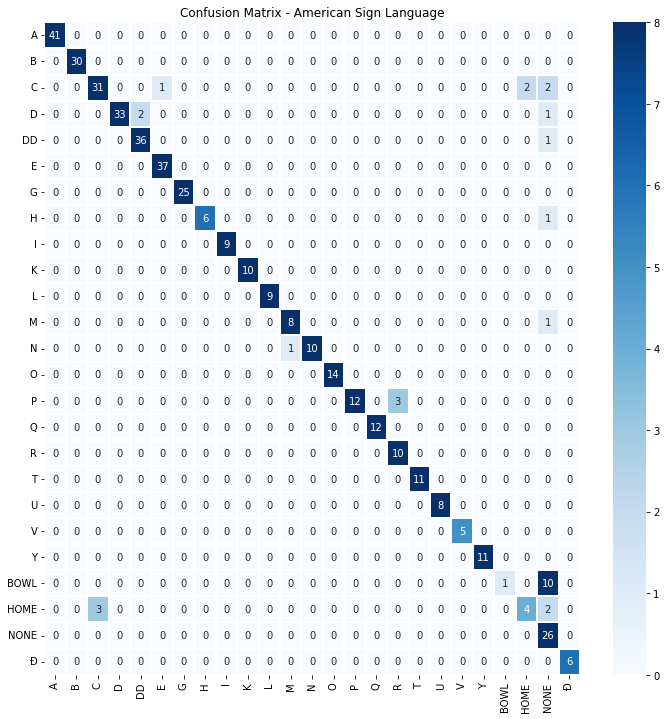

In [17]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [18]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)